# **1.Conectamos Colab con Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
PATH_ORIGEN = "/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG"
os.chdir(PATH_ORIGEN)

In [3]:
%matplotlib inline
import cv2
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
from random import shuffle
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation
import sys
import h5py
import utils_final

import tensorflow as tf

In [4]:
sys.path.append(os.path.abspath(PATH_ORIGEN))

In [5]:
# Frame size  
img_size = 224

img_size_touple = (img_size, img_size)

# Number of channels (RGB)
num_channels = 3

# Flat frame size
img_size_flat = img_size * img_size * num_channels

# Number of classes for classification (HGG-LGG)
num_classes = 2

# Number of files to train
_num_files_train = 1

# Number of frames per video
_images_per_file = 155

# Number of frames per training set
_num_images_train = _num_files_train * _images_per_file

# Video extension
video_exts = ".mp4"

In [6]:
in_dir = "/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/AVI-2015"

# **2.Llamando funciones de Utils.py**

In [7]:
names, labels = utils_final.label_video_names(in_dir)

In [8]:
names

('HGG_VSD.Brain.XX.O.MR_Flair.36587.mp4',
 'LGG_VSD.Brain.XX.O.MR_Flair.54656.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.41080.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.36100.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.40935.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.35565.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.35541.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.36201.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.35930.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.54524.mp4',
 'LGG_VSD.Brain.XX.O.MR_Flair.36045.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.35639.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.41056.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.36161.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.35678.mp4',
 'LGG_VSD.Brain.XX.O.MR_Flair.35902.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.35591.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.40895.mp4',
 'LGG_VSD.Brain.XX.O.MR_Flair.36307.mp4',
 'LGG_VSD.Brain.XX.O.MR_Flair.54650.mp4',
 'LGG_VSD.Brain.XX.O.MR_Flair.35828.mp4',
 'LGG_VSD.Brain.XX.O.MR_Flair.41064.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.36060.mp4',
 'HGG_VSD.Brain.XX.O.MR_Flair.3580

In [9]:
labels

([1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 

In [10]:
frames = utils_final.get_frames(in_dir, names[12],modo = 1)

In [11]:
visible_frame = (frames*255).astype('uint8')

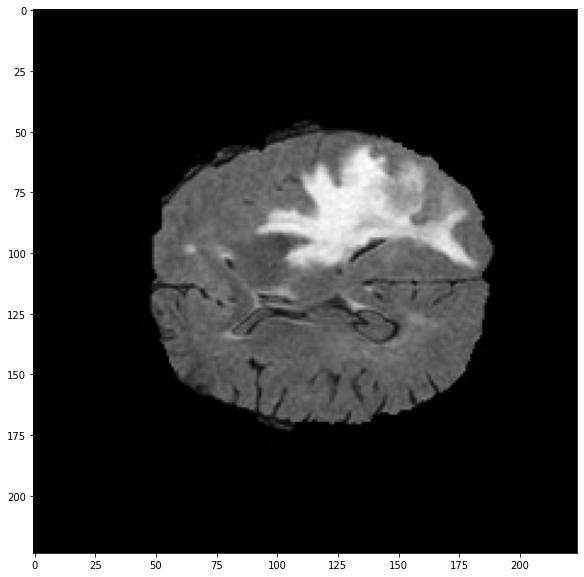

In [12]:
plt.figure(1,figsize = (10,10))
plt.imshow(visible_frame[85][:,:,2],cmap = 'gray')
plt.show()

# **3. Arquitectura de la CNN**

In [13]:
image_model = VGG16(include_top = True , weights = 'imagenet', input_shape = (224, 224,3))

553476096/553467096 [==============================] - 4s 0us/step


In [14]:
image_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
transfer_layer = image_model.get_layer('fc2')

In [16]:
image_model_transfer = Model(inputs=image_model.input, outputs=transfer_layer.output)

In [17]:
image_model_transfer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
transfer_values_size = K.int_shape(transfer_layer.output)[1]

In [19]:
print("The input of the VGG16 net have dimensions:",K.int_shape(image_model.input)[1:3])
print("The output of the selecter layer of VGG16 net have dimensions: ", transfer_values_size)

The input of the VGG16 net have dimensions: (224, 224)
The output of the selecter layer of VGG16 net have dimensions:  4096


# **4.Train / Test**

In [ ]:
names

In [20]:
# Training
training_set = int(len(names)*0.8)
names_training = names[0:training_set]
labels_training = labels[0:training_set]

In [21]:
print(training_set)
print(names_training)
print(labels_training)

219
('HGG_VSD.Brain.XX.O.MR_Flair.36587.mp4', 'LGG_VSD.Brain.XX.O.MR_Flair.54656.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.41080.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.36100.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.40935.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.35565.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.35541.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.36201.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.35930.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.54524.mp4', 'LGG_VSD.Brain.XX.O.MR_Flair.36045.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.35639.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.41056.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.36161.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.35678.mp4', 'LGG_VSD.Brain.XX.O.MR_Flair.35902.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.35591.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.40895.mp4', 'LGG_VSD.Brain.XX.O.MR_Flair.36307.mp4', 'LGG_VSD.Brain.XX.O.MR_Flair.54650.mp4', 'LGG_VSD.Brain.XX.O.MR_Flair.35828.mp4', 'LGG_VSD.Brain.XX.O.MR_Flair.41064.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.36060.mp4', 'HGG_VSD.Brain.XX.O.MR_Flair.35808.mp4', 'LGG_VSD.Br

In [22]:
# Test
test_set = int(len(names)*0.2)
names_test = names[training_set:]
labels_test = labels[training_set:]

In [23]:
# Generando Prueba.h5
utils_final.make_files(training_set, names_training, in_dir, labels_training,transfer_values_size,image_model_transfer,"prueba_Mod1_BRATS2015.h5",modo = 1)

- Progreso: 99.5%

In [ ]:
# # Generando Pruebavalidation.h5
utils_mod2015.make_files_test(test_set, names_test, in_dir, labels_test, transfer_values_size, image_model_transfer,"pruebavalidation_Mod1_BRATS2015.h5",modo = 1)

- Progreso: 98.1%

In [ ]:
# Obteniendo los registros de prueba.h5
data, target = utils_mod2015.process_alldata_training("prueba_Mod1_BRATS2015.h5",modo = 1)

In [ ]:
print(data[0].shape)
print(target[0].shape)

(155, 4096)
(2,)


In [ ]:
print(len(data))
print(len(target))

219
219


In [ ]:
# Obteniendo los registros de Pruebavalidation.h5
data_test, target_test = utils_mod2015.process_alldata_test("pruebavalidation_Mod0_BRATS2020.h5",modo = 0)

In [ ]:
print(data_test[0].shape)
print(target_test[0].shape)

(155, 4096)
(2,)


In [ ]:
print(len(data_test))
print(len(target_test))

54
54


## **5.Arquitectura LSTM**

In [ ]:
chunk_size = 4096
n_chunks = 155
rnn_size = 512 #### 100 neuronas

model = Sequential()

model.add(LSTM(rnn_size, input_shape=(n_chunks, chunk_size))) # RNN,GRU


model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               9439232   
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 50)                51250     
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
 activation_2 (Activation)   (None, 2)                 0

In [ ]:
# Dividimos prueba.h5 como train y validacion
print(len(data))
print(len(target))

219
219


In [ ]:
print(data[0].shape)
print(data[1].shape)

(155, 4096)
(155, 4096)


In [ ]:
print(len(data[0:5])) # 5 registros de resonancia magnética
print(len(data[0:5][0])) # tamaño de uno de estos registsros
print(len(data[0:])) # numero total de registros de resonancia magnética en Prueba.h5

5
155
219


In [ ]:
# Numero de registros en Pruebavalidation.h5
total_train = len(data[0:])
train = int(total_train*0.8)
print("Numero de registros totales en Prueba.h5",total_train)
print("Numero de registros para entrenamiento",train)
print("Numero de registros totales en validation",total_train - train )

Numero de registros totales en Prueba.h5 219
Numero de registros para entrenamiento 175
Numero de registros totales en validation 44


In [ ]:
# Entrenando
epoch = 20
batchS = 50

history = model.fit(np.array(data[0:train]), np.array(target[0:train]), epochs=epoch,
                    validation_data=(np.array(data[train:]), np.array(target[train:])), 
                    batch_size=batchS, verbose=1)

Epoch 1/20
4/4 [==============================] - 4s 357ms/step - loss: 0.6704 - accuracy: 0.8114 - val_loss: 0.5053 - val_accuracy: 0.8182
Epoch 2/20
4/4 [==============================] - 1s 193ms/step - loss: 0.5212 - accuracy: 0.8114 - val_loss: 0.4806 - val_accuracy: 0.8182
Epoch 3/20
4/4 [==============================] - 1s 210ms/step - loss: 0.4976 - accuracy: 0.8114 - val_loss: 0.4814 - val_accuracy: 0.8182
Epoch 4/20
4/4 [==============================] - 1s 196ms/step - loss: 0.4915 - accuracy: 0.8114 - val_loss: 0.4745 - val_accuracy: 0.8182
Epoch 5/20
4/4 [==============================] - 1s 193ms/step - loss: 0.4950 - accuracy: 0.8114 - val_loss: 0.4787 - val_accuracy: 0.8182
Epoch 6/20
4/4 [==============================] - 1s 197ms/step - loss: 0.4938 - accuracy: 0.8114 - val_loss: 0.4742 - val_accuracy: 0.8182
Epoch 7/20
4/4 [==============================] - 1s 194ms/step - loss: 0.4854 - accuracy: 0.8114 - val_loss: 0.4741 - val_accuracy: 0.8182
Epoch 8/20
4/4 [====

# **5.Métricas**

In [ ]:
result = model.evaluate(np.array(data_test), np.array(target_test))

2/2 [==============================] - 0s 64ms/step - loss: 0.5334 - accuracy: 0.7778


In [ ]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.533377468585968
accuracy 0.7777777910232544


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


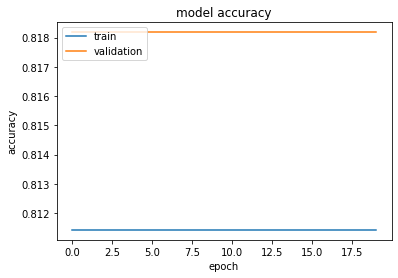

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


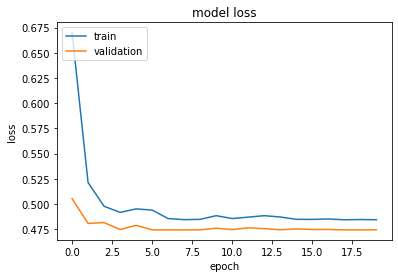

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path1.eps', format='eps', dpi=1000)
plt.show()